In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

students = pd.read_csv('stud_math.csv')

#Общая информация о датасете
students.info()

#Определим общее количество записей в датасете
students.count()

#Количество уникальных значений в датасете
students.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

school                  2
sex                     2
age                     8
address                 2
famsize                 2
Pstatus                 2
Medu                    5
Fedu                    6
Mjob                    5
Fjob                    5
reason                  4
guardian                3
traveltime              4
studytime               4
failures                4
schoolsup               2
famsup                  2
paid                    2
activities              2
nursery                 2
studytime, granular     4
higher                  2
internet                2
romantic                2
famrel                  6
freetime                5
goout                   5
health                  5
absences               36
score                  18
dtype: int64

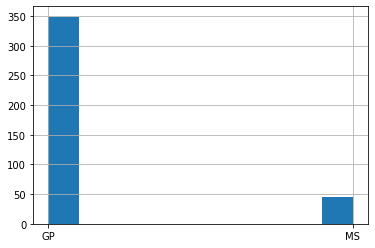

In [3]:
#Анализ столбца school
students.school.hist()

In [4]:
#Анализ значений экзамена по математике по школе GP
school_GP_score = students[students.school == 'GP'][['school','score']]
round(school_GP_score.mean(),2)

score    52.63
dtype: float64

In [5]:
#Анализ значений экзамена по математике по школе MS
school_MS_score = students[students.school == 'MS'][['school', 'score']]
round(school_MS_score.mean(),2)

score    49.44
dtype: float64

Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет

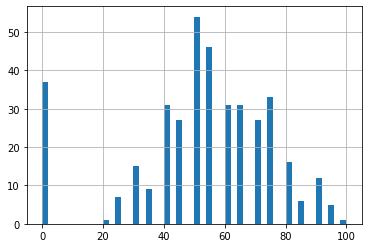

In [6]:
#Проверка на наличие выбросов в столбце score

#Расчет межквартильного размаха
IRQ_score = students['score'].quantile(q=0.75, interpolation='midpoint') - students['score'].quantile(q=0.25, interpolation='midpoint')

#Расчет перцентителей
score_perc25 = students.score.quantile(0.25)
score_perc75 = students.score.quantile(0.75)

#Поиск выбросов
eject_score_low = score_perc25 - 1.5*IRQ_score
eject_score_high = score_perc75 + 1.5*IRQ_score

for i in students['score']:
    if i < eject_score_low:
        print('Выбросы есть')
    elif i > eject_score_high:
        print('Выбросы есть')
    else:
        print('Выбросов нет')

students.score.hist(bins=50)

In [14]:
#Формируем новый датасет, исключая из него записи с отсутствующими значениями в столбце score
students = students[~students['score'].isnull()]
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               389 non-null    object 
 1   sex                  389 non-null    object 
 2   age                  389 non-null    int64  
 3   address              374 non-null    object 
 4   famsize              362 non-null    object 
 5   Pstatus              344 non-null    object 
 6   Medu                 386 non-null    float64
 7   Fedu                 365 non-null    float64
 8   Mjob                 370 non-null    object 
 9   Fjob                 353 non-null    object 
 10  reason               372 non-null    object 
 11  guardian             358 non-null    object 
 12  traveltime           361 non-null    float64
 13  studytime            382 non-null    float64
 14  failures             367 non-null    float64
 15  schoolsup            380 non-null    obj

204

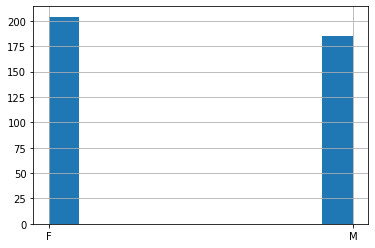

In [33]:
#Анализ столбца sex
students.sex.hist()

#Подсчет количества девушек в новом датасете
female = students[students.sex == 'F']
female.sex.count()

In [34]:
#Подсчет количества мальчиков в новом датасете
male = students[students.sex == 'M']
male.sex.count()

185

In [35]:
#Определение среднего балла по математике среди девушек
round(female.score.mean(),2)

50.1

In [36]:
#Определение среднего балла по математике среди мальчиков
round(male.score.mean(),2)

54.65

In [37]:
#Анализ значений экзамена по математике у девушек по школе GP
female_GP_score = female[female.school == 'GP'][['school','score']]
round(female_GP_score.mean(),2)

score    50.17
dtype: float64

In [39]:
#Анализ значений экзамена по математике у девушек по школе MS
female_MS_score = female[female.school == 'MS'][['school','score']]
round(female_MS_score.mean(),2)

score    49.6
dtype: float64

In [40]:
#Анализ значений экзамена по математике у мальчиков по школе GP
male_GP_score = male[male.school == 'GP'][['school','score']]
round(male_GP_score.mean(),2)

score    55.3
dtype: float64

In [41]:
#Анализ значений экзамена по математике у мальчиков по школе MS
male_MS_score = male[male.school == 'MS'][['school','score']]
round(male_MS_score.mean(),2)

score    49.25
dtype: float64

Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет

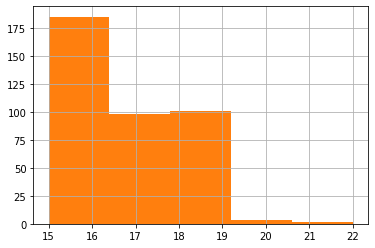

In [161]:
#Анализ столбца age
students.age.hist()

#Расчет межквартильного размаха по столбу age
IRQ_age = students['age'].quantile(q=0.75, interpolation='midpoint') - students['age'].quantile(q=0.25, interpolation='midpoint')

#Расчет перцентителей
age_perc25 = students.age.quantile(0.25)
age_perc75 = students.age.quantile(0.75)

#Поиск выбросов
eject_age_low = age_perc25 - 1.5*IRQ_age
eject_age_high = age_perc75 + 1.5*IRQ_age

for i in students['age']:
    if i < eject_age_low:
        print('Выбросы есть', i)
    elif i > eject_age_high:
        print('Выбросы есть', i)
    else:
        print('Выбросов нет')
        
students.age.hist(bins=5)

In [162]:
#Проверка корреляции между возрастом и оценкой на экзамене по математике
students.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.146736,-0.132182,0.073146,-0.018227,0.205919,0.018227,0.060414,0.016099,0.121115,-0.068103,0.096628,-0.155726
Medu,-0.146736,1.000000,0.270754,-0.165838,0.081032,-0.240319,-0.081032,0.000602,0.038265,0.072320,-0.048331,-0.014047,0.213349
Fedu,-0.132182,0.270754,1.000000,0.038990,0.059618,-0.150023,-0.059618,0.045665,-0.062377,-0.019312,0.024861,0.003762,0.078573
traveltime,0.073146,-0.165838,0.038990,1.000000,-0.105910,0.049738,0.105910,-0.027395,-0.026299,0.032629,-0.011724,-0.048242,-0.070559
studytime,-0.018227,0.081032,0.059618,-0.105910,1.000000,-0.181947,-1.000000,0.046249,-0.125066,-0.053831,-0.079180,-0.025707,0.115741
failures,0.205919,-0.240319,-0.150023,0.049738,-0.181947,1.000000,0.181947,-0.034836,0.091608,0.107747,0.088013,0.058166,-0.344338
"studytime, granular",0.018227,-0.081032,-0.059618,0.105910,-1.000000,0.181947,1.000000,-0.046249,0.125066,0.053831,0.079180,0.025707,-0.115741
famrel,0.060414,0.000602,0.045665,-0.027395,0.046249,-0.034836,-0.046249,1.000000,0.174193,0.076387,0.080089,-0.082489,0.057112
freetime,0.016099,0.038265,-0.062377,-0.026299,-0.125066,0.091608,0.125066,0.174193,1.000000,0.296338,0.064315,0.010745,0.019026
goout,0.121115,0.072320,-0.019312,0.032629,-0.053831,0.107747,0.053831,0.076387,0.296338,1.000000,-0.018026,-0.047954,-0.129685


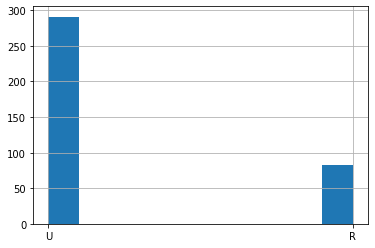

In [42]:
#Анализ столбца address
students.address.hist()

In [45]:
#Подсчет количества проживающих в городе
urban_citizens = students[students.address == 'U']
urban_citizens.address.count()

291

In [47]:
#Подсчет количества проживающих за городом
suburban_citizens = students[students.address == 'R']
suburban_citizens.address.count()

83

In [123]:
#Замена пропусков в столбце address на None
students.address = students.address.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)

In [77]:
#Определение среднего балла по математике среди учеников, проживающих в городе
round(urban_citizens.score.mean(),2)

53.57

In [78]:
#Определение среднего балла по математике среди учеников, проживающих за городом
round(suburban_citizens.score.mean(),2)

46.93

In [85]:
#Определение среднего балла по математике среди девушек, проживающих в городе и учащихся в школе GP
round(urban_citizens[(urban_citizens.sex == 'F') & (urban_citizens.school == 'GP')].score.mean(),2)

51.15

In [86]:
#Определение среднего балла по математике среди девушек, проживающих в городе и учащихся в школе MS
round(urban_citizens[(urban_citizens.sex == 'F') & (urban_citizens.school == 'MS')].score.mean(),2)

48.33

In [87]:
#Определение среднего балла по математике среди мальчиков, проживающих в городе и учащихся в школе GP
round(urban_citizens[(urban_citizens.sex == 'M') & (urban_citizens.school == 'GP')].score.mean(),2)

56.43

In [88]:
#Определение среднего балла по математике среди мальчиков, проживающих в городе и учащихся в школе MS
round(urban_citizens[(urban_citizens.sex == 'M') & (urban_citizens.school == 'MS')].score.mean(),2)

56.67

In [89]:
#Определение среднего балла по математике среди девушек, проживающих за городом и учащихся в школе GP
round(suburban_citizens[(suburban_citizens.sex == 'F') & (suburban_citizens.school == 'GP')].score.mean(),2)

46.61

In [90]:
#Определение среднего балла по математике среди девушек, проживающих за городом и учащихся в школе MS
round(suburban_citizens[(suburban_citizens.sex == 'F') & (suburban_citizens.school == 'MS')].score.mean(),2)

45.77

In [91]:
#Определение среднего балла по математике среди мальчиков, проживающих за городом и учащихся в школе GP
round(suburban_citizens[(suburban_citizens.sex == 'M') & (suburban_citizens.school == 'GP')].score.mean(),2)

49.48

In [92]:
#Определение среднего балла по математике среди мальчиков, проживающих за городом и учащихся в школе MS
round(suburban_citizens[(suburban_citizens.sex == 'M') & (suburban_citizens.school == 'MS')].score.mean(),2)

42.0

107

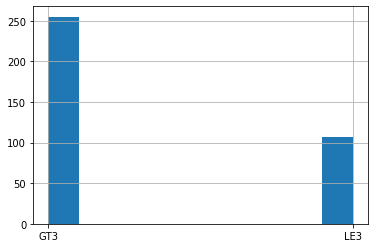

In [125]:
#Анализ столбца famsize (размер семьи)
students.famsize.hist()

##Замена пропусков в столбце famsize на None
students.famsize = students.famsize.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)

#Подсчет количества семей с одним ребенком
small_family = students[students.famsize == 'LE3']
small_family.famsize.count()

In [126]:
#Подсчет количества семей с более чем одним ребенком
big_family = students[students.famsize == 'GT3']
big_family.famsize.count()

255

In [127]:
#Определение среднего балла по математике среди учеников, проживающих в условно маленьких семьях
round(small_family.score.mean(),2)

54.67

In [128]:
#Определение среднего балла по математике среди учеников, проживающих в условно больших семьях
round(big_family.score.mean(),2)

51.51

In [129]:
#Определение среднего балла по математике среди девушек из маленьких семей, проживающих в городе и учащихся в школе GP
round(small_family[(small_family.sex == 'F') & (small_family.school == 'GP') & (small_family.address == 'U')].score.mean(),2)

51.47

In [130]:
#Определение среднего балла по математике среди девушек из маленьких семей, проживающих в городе и учащихся в школе MS
round(small_family[(small_family.sex == 'F') & (small_family.school == 'MS') & (small_family.address == 'U')].score.mean(),2)

53.75

In [131]:
#Определение среднего балла по математике среди девушек из маленьких семей, проживающих за городом и учащихся в школе GP
round(small_family[(small_family.sex == 'F') & (small_family.school == 'GP') & (small_family.address == 'R')].score.mean(),2)

62.5

In [132]:
#Определение среднего балла по математике среди девушек из маленьких семей, проживающих за городом и учащихся в школе MS
round(small_family[(small_family.sex == 'F') & (small_family.school == 'MS') & (small_family.address == 'R')].score.mean(),2)

72.5

In [133]:
#Определение среднего балла по математике среди мальчиков из маленьких семей, проживающих в городе и учащихся в школе GP
round(small_family[(small_family.sex == 'M') & (small_family.school == 'GP') & (small_family.address == 'U')].score.mean(),2)

56.41

In [134]:
#Определение среднего балла по математике среди мальчиков из маленьких семей, проживающих в городе и учащихся в школе MS
round(small_family[(small_family.sex == 'M') & (small_family.school == 'MS') & (small_family.address == 'U')].score.mean(),2)

54.17

In [135]:
#Определение среднего балла по математике среди мальчиков из маленьких семей, проживающих за городом и учащихся в школе GP
round(small_family[(small_family.sex == 'M') & (small_family.school == 'GP') & (small_family.address == 'R')].score.mean(),2)

47.14

In [136]:
#Определение среднего балла по математике среди мальчиков из маленьких семей, проживающих за городом и учащихся в школе MS
round(small_family[(small_family.sex == 'M') & (small_family.school == 'MS') & (small_family.address == 'R')].score.mean(),2)

56.67

In [137]:
#Определение среднего балла по математике среди девушек из больших семей, проживающих в городе и учащихся в школе GP
round(big_family[(big_family.sex == 'F') & (big_family.school == 'GP') & (big_family.address == 'U')].score.mean(),2)

51.39

In [138]:
#Определение среднего балла по математике среди девушек из больших семей, проживающих в городе и учащихся в школе MS
round(big_family[(big_family.sex == 'F') & (big_family.school == 'MS') & (big_family.address == 'U')].score.mean(),2)

44.0

In [139]:
#Определение среднего балла по математике среди девушек из больших семей, проживающих за городом и учащихся в школе GP
round(big_family[(big_family.sex == 'F') & (big_family.school == 'GP') & (big_family.address == 'R')].score.mean(),2)

42.8

In [140]:
#Определение среднего балла по математике среди девушек из больших семей, проживающих за городом и учащихся в школе MS
round(big_family[(big_family.sex == 'F') & (big_family.school == 'MS') & (big_family.address == 'R')].score.mean(),2)

42.78

In [141]:
#Определение среднего балла по математике среди мальчиков из больших семей, проживающих в городе и учащихся в школе GP
round(big_family[(big_family.sex == 'M') & (big_family.school == 'GP') & (big_family.address == 'U')].score.mean(),2)

56.75

In [142]:
#Определение среднего балла по математике среди мальчиков из больших семей, проживающих в городе и учащихся в школе MS
round(big_family[(big_family.sex == 'M') & (big_family.school == 'MS') & (big_family.address == 'U')].score.mean(),2)

61.67

In [143]:
#Определение среднего балла по математике среди мальчиков из больших семей, проживающих за городом и учащихся в школе GP
round(big_family[(big_family.sex == 'M') & (big_family.school == 'GP') & (big_family.address == 'R')].score.mean(),2)

50.0

In [144]:
#Определение среднего балла по математике среди мальчиков из больших семей, проживающих за городом и учащихся в школе MS
round(big_family[(big_family.sex == 'M') & (big_family.school == 'MS') & (big_family.address == 'R')].score.mean(),2)

35.71

308

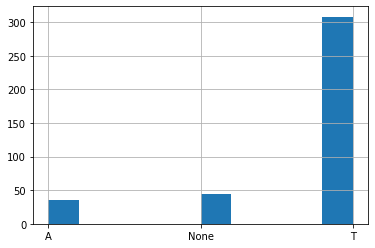

In [149]:
#Анализ столбца Pstatus
students.Pstatus.hist()

##Замена пропусков в столбце Pstatus на None
students.Pstatus = students.Pstatus.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)

#Подсчет количества семей, живущих вместе
parents_status_T = students[students.Pstatus == 'T']
parents_status_T.Pstatus.count()

In [150]:
#Подсчет количества семей, живущих раздельно
parents_status_A = students[students.Pstatus == 'A']
parents_status_A.Pstatus.count()

36

In [151]:
#Определение среднего балла по математике среди учеников, проживающих в полных семьях
round(parents_status_T.score.mean(),2)

51.7

In [152]:
#Определение среднего балла по математике среди учеников, проживающих в неполных семьях
round(parents_status_A.score.mean(),2)

55.14

55.0

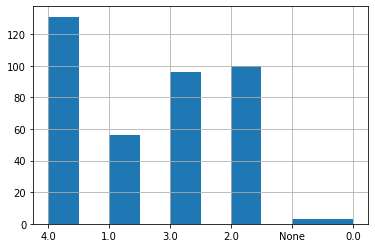

In [186]:
#Анализ столбца Medu
students.Medu.hist()

#Исключение из столбца отсутствующих значений
students_Medu = students[~students['Medu'].isnull()]



#Замена пропусков в столбце Medu на None
#students.Medu = students.Medu.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)

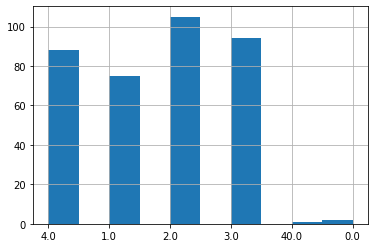

In [180]:
#Анализ столбца Fedu
students.Fedu.hist()

#Замена пропусков в столбце Medu на None
students.Fedu = students.Fedu.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)